In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
data_path = '../data/train'
train_path = os.path.join(data_path, 'train_ratings.csv')

train_data = pd.read_csv(train_path)

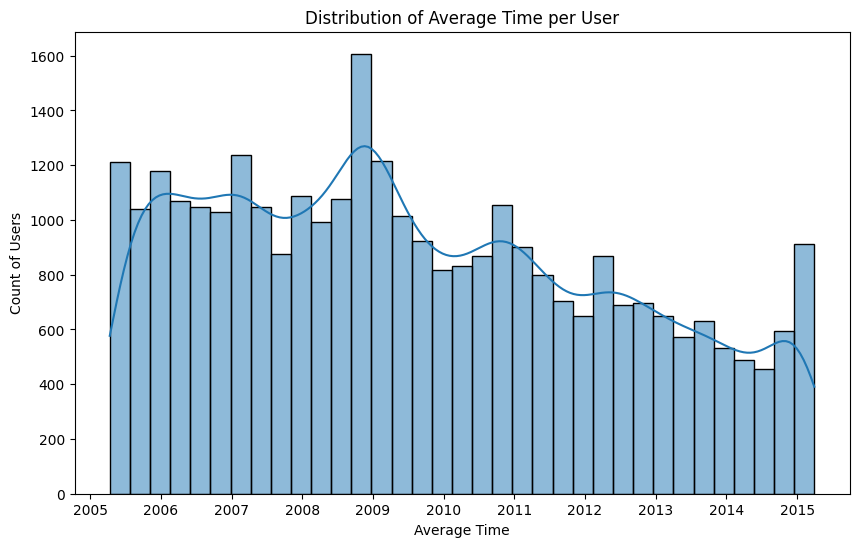

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Unix timestamp를 datetime 객체로 변환 (unit='s'는 초 단위를 의미)
train_data['readable_time'] = pd.to_datetime(train_data['time'], unit='s')

# 유저별 평균 타임스탬프 계산
user_avg_timestamp = train_data.groupby('user')['time'].mean().reset_index()

# 평균 타임스탬프를 다시 사람이 읽기 쉬운 형태로 변환
user_avg_timestamp['avg_readable_time'] = pd.to_datetime(user_avg_timestamp['time'], unit='s')

# 2. 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(user_avg_timestamp['avg_readable_time'], kde=True) # kde=True는 곡선을 같이 그려줍니다
plt.title('Distribution of Average Time per User') # 그래프 제목
plt.xlabel('Average Time') # x축 라벨
plt.ylabel('Count of Users') # y축 라벨
plt.show()

In [4]:
train_data

,user,item,time,readable_time
0,11,4643,1230782529,2009-01-01 04:02:09
1,11,170,1230782534,2009-01-01 04:02:14
2,11,531,1230782539,2009-01-01 04:02:19
3,11,616,1230782542,2009-01-01 04:02:22
4,11,2140,1230782563,2009-01-01 04:02:43
...,...,...,...,...
5154466,138493,44022,1260209449,2009-12-07 18:10:49
5154467,138493,4958,1260209482,2009-12-07 18:11:22
5154468,138493,68319,1260209720,2009-12-07 18:15:20
5154469,138493,40819,1260209726,2009-12-07 18:15:26


In [ ]:
# 인기있는 아이템들
popular_items = train_data.groupby('item')['user'].count().reset_index(name='count')
popular_items = popular_items.sort_values(by='count', ascending=False)
print(popular_items.head(100))

       item  count
1435   2571  19699
1642   2959  18437
179     296  18202
193     318  18168
220     356  17339
...     ...    ...
657    1208   7974
3068   6016   7933
2212   4027   7876
5279  54286   7855
3328   6711   7846

[100 rows x 2 columns]


In [8]:
genre_path = os.path.join(data_path, 'genres.tsv')
genre = pd.read_csv(genre_path, sep='\t')

In [68]:

genre_list = genre['genre'].unique()
print(f'장르 종류 : {genre_list}')

장르 종류 : ['Crime' 'Drama' 'Action' 'Sci-Fi' 'Thriller' 'Comedy' 'Romance' 'War'
 'Adventure' 'Fantasy' 'Horror' 'Mystery' 'Animation' 'Children'
 'Film-Noir' 'Musical' 'Western' 'Documentary']


In [ ]:
genres_by_item = genre.groupby('item')['genre'].apply(list).reset_index(name='genres')
empty_row = len(genres_by_item[genres_by_item['genres'].apply(lambda x: len(x) == 0)])

print('총 item 개수: ',train_data['item'].nunique())
print(f'영화 장르가 없는 영화의 개수(결측치): {empty_row}')
print('item 별 영화 장르')
print(genres_by_item)

영화 장르가 없는 영화의 개수(결측치): 0
총 item 개수:  6807
item 별 영화 장르
        item                                             genres
0          1  [Adventure, Animation, Children, Comedy, Fantasy]
1          2                     [Adventure, Children, Fantasy]
2          3                                  [Comedy, Romance]
3          4                           [Comedy, Drama, Romance]
4          5                                           [Comedy]
...      ...                                                ...
6802  118700                                            [Drama]
6803  118900                                            [Drama]
6804  118997               [Children, Comedy, Fantasy, Musical]
6805  119141                                   [Action, Comedy]
6806  119145                 [Action, Adventure, Comedy, Crime]

[6807 rows x 2 columns]


In [57]:
popular_items_data = pd.merge(popular_items, genres_by_item, on='item', how='left')
print(popular_items_data.head(1000))

      item  count                            genres
0     2571  19699        [Action, Sci-Fi, Thriller]
1     2959  18437  [Action, Crime, Drama, Thriller]
2      296  18202  [Comedy, Crime, Drama, Thriller]
3      318  18168                    [Crime, Drama]
4      356  17339     [Comedy, Drama, Romance, War]
..     ...    ...                               ...
995   4103   1215   [Action, Adventure, Drama, War]
996    319   1213         [Comedy, Drama, Thriller]
997  34542   1211                     [Documentary]
998   1103   1209                           [Drama]
999   5015   1207                  [Drama, Romance]

[1000 rows x 3 columns]


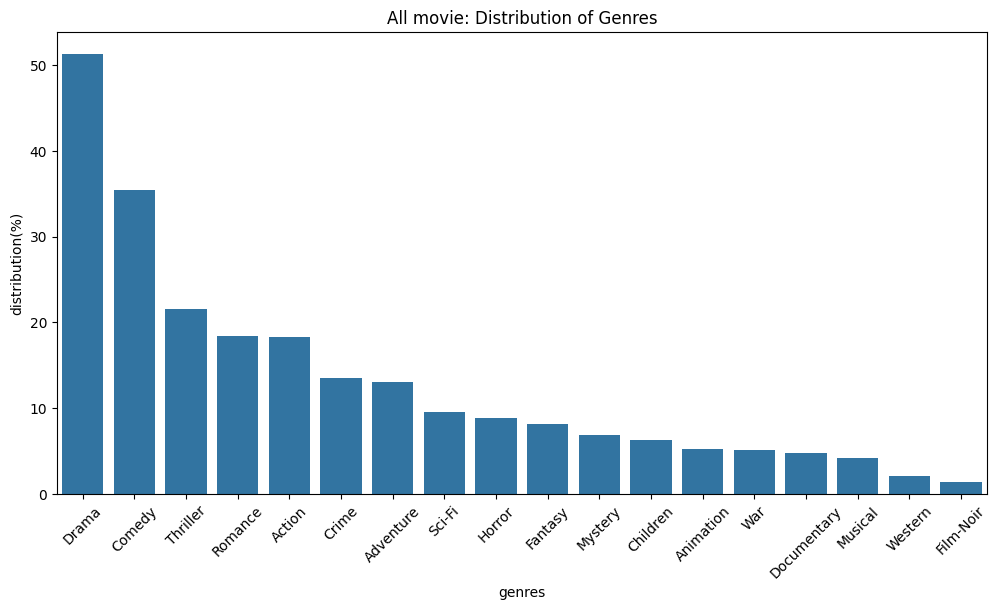

In [82]:
from collections import Counter
import itertools

# genres의 모든 리스트들을 하나의 리스트로 묶기
all_movie_genres = list(itertools.chain(*popular_items_data['genres']))

# 장르별 개수 세기
genre_counts = Counter(all_movie_genres)

import matplotlib.pyplot as plt
import seaborn as sns

sorted_genres = genre_counts.most_common()

x_labels, y_values = zip(*sorted_genres)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(x_labels), y=(list(np.array(y_values)/len(popular_items)*100)))
plt.xticks(rotation=45)
plt.title('All movie: Distribution of Genres')
plt.xlabel('genres')
plt.ylabel('distribution(%)')
plt.show()

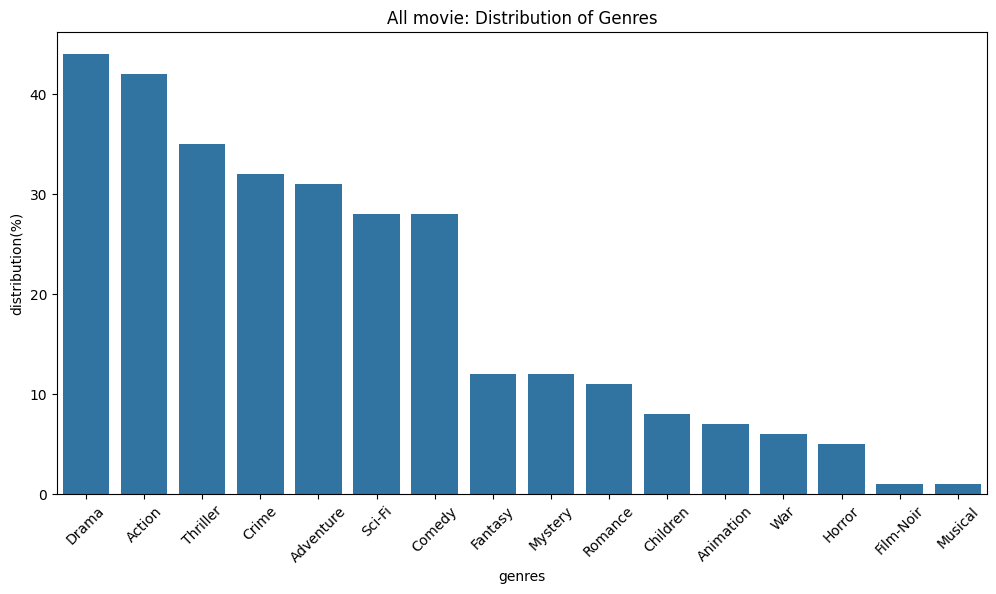

In [ ]:
# genres의 모든 리스트들을 하나의 리스트로 묶기
top100_movie_genres = list(itertools.chain(*popular_items_data['genres'][:100]))

# 장르별 개수 세기
top100_genre_counts = Counter(top100_movie_genres)

import matplotlib.pyplot as plt
import seaborn as sns

sorted_genres = top100_genre_counts.most_common()

x_labels, y_values = zip(*sorted_genres)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(x_labels), y=(list(np.array(y_values)/100*100)))
plt.xticks(rotation=45)
plt.title('Top100 movies: Distribution of Genres')
plt.xlabel('genres')
plt.ylabel('distribution(%)')
plt.show()